In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
dataset = pd.read_csv("/kaggle/input/student-performance-bd/bd_students_per_v2.csv")

In [3]:
print("Dataset Preview:")
print(dataset.head())

Dataset Preview:
   id         full_name  age  gender location  family_size mother_education  \
0   2        Avi Biswas   16    Male    Urban            6              SSC   
1   3   Taslima Sultana   18  Female    Rural            6              SSC   
2   4  Md Adilur Rahman   15    Male    Rural            4              SSC   
3   5       Saleh Ahmed   16    Male    Rural            6              SSC   
4   6         Din Islam   17    Male    Urban            5           Honors   

  father_education mother_job father_job  ... tutoring school_type attendance  \
0              HSC         No         No  ...      Yes     Private         95   
1              HSC         No        Yes  ...       No   Semi_Govt         92   
2              SSC        Yes        Yes  ...      Yes        Govt         81   
3              SSC        Yes        Yes  ...      Yes     Private         90   
4          Masters         No        Yes  ...      Yes   Semi_Govt         75   

   extra_curricular_a

In [4]:
print("\nDataset Shape:", dataset.shape)


Dataset Shape: (8612, 24)


In [5]:
print("\nMissing Values:")
print(dataset.isnull().sum())


Missing Values:
id                              0
full_name                       0
age                             0
gender                          0
location                        1
family_size                     0
mother_education               10
father_education                4
mother_job                      0
father_job                      0
guardian                        0
parental_involvement            0
internet_access                 0
studytime                       0
tutoring                        0
school_type                     0
attendance                      0
extra_curricular_activities     0
english                         0
math                            0
science                         0
social_science                  0
art_culture                     0
stu_group                       0
dtype: int64


In [6]:
df = pd.DataFrame(dataset)
df

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
0,2,Avi Biswas,16,Male,Urban,6,SSC,HSC,No,No,...,Yes,Private,95,Yes,95,98,92,94,98,Science
1,3,Taslima Sultana,18,Female,Rural,6,SSC,HSC,No,Yes,...,No,Semi_Govt,92,No,65,71,40,78,80,Commerce
2,4,Md Adilur Rahman,15,Male,Rural,4,SSC,SSC,Yes,Yes,...,Yes,Govt,81,Yes,64,78,58,86,74,Commerce
3,5,Saleh Ahmed,16,Male,Rural,6,SSC,SSC,Yes,Yes,...,Yes,Private,90,Yes,84,90,85,86,88,Science
4,6,Din Islam,17,Male,Urban,5,Honors,Masters,No,Yes,...,Yes,Semi_Govt,75,Yes,54,70,45,79,76,Commerce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,8609,Elina Khanam,17,Female,City,5,HSC,Non_Educated,No,No,...,No,Govt,78,Yes,81,83,80,84,91,Science
8608,8610,Sadiq Ghosh,16,Male,City,2,SSC,Under_SSC,No,Yes,...,No,Private,73,No,95,100,96,98,98,Science
8609,8611,Arman Amin,18,Male,City,3,Diploma,SSC,No,No,...,Yes,Private,51,No,45,59,41,51,69,Arts
8610,8612,Tawhidul Saif,15,Male,Urban,5,Honors,HSC,No,No,...,No,Private,66,Yes,59,65,60,68,69,Arts


In [7]:
# Remove rows with missing values
df_cleaned = dataset.dropna()

In [8]:
# Verify no missing values remain
print("\nMissing Values After Cleaning:")
print(df_cleaned.isnull().sum())


Missing Values After Cleaning:
id                             0
full_name                      0
age                            0
gender                         0
location                       0
family_size                    0
mother_education               0
father_education               0
mother_job                     0
father_job                     0
guardian                       0
parental_involvement           0
internet_access                0
studytime                      0
tutoring                       0
school_type                    0
attendance                     0
extra_curricular_activities    0
english                        0
math                           0
science                        0
social_science                 0
art_culture                    0
stu_group                      0
dtype: int64


In [9]:
df = df_cleaned

In [10]:
categorical_columns = ['gender', 'stu_group']

In [11]:
# One-Hot Encode categorical columns
df_pandas_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [12]:
print("\nEncoded Dataset Preview:")
print(df_pandas_encoded.head())


Encoded Dataset Preview:
   id         full_name  age location  family_size mother_education  \
0   2        Avi Biswas   16    Urban            6              SSC   
1   3   Taslima Sultana   18    Rural            6              SSC   
2   4  Md Adilur Rahman   15    Rural            4              SSC   
3   5       Saleh Ahmed   16    Rural            6              SSC   
4   6         Din Islam   17    Urban            5           Honors   

  father_education mother_job father_job guardian  ... attendance  \
0              HSC         No         No   Father  ...         95   
1              HSC         No        Yes   Father  ...         92   
2              SSC        Yes        Yes   Father  ...         81   
3              SSC        Yes        Yes   Father  ...         90   
4          Masters         No        Yes   Father  ...         75   

  extra_curricular_activities  english math science  social_science  \
0                         Yes       95   98      92          

In [13]:
# Custom mapping
custom_mapping = {'Non_Educated':0,'Under_SSC':1,'SSC':2,'HSC':3 ,'Diploma':4,'Honors':5,'Hons':5 ,'Masters':6}

# Apply the mapping
df_pandas_encoded['mother_education'] = df_pandas_encoded['mother_education'].map(custom_mapping)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_pandas_encoded['mother_education'] = encoder.fit_transform(df_pandas_encoded['mother_education'])

print(df_pandas_encoded['mother_education'] )

0       2
1       2
2       2
3       2
4       5
       ..
8607    3
8608    2
8609    4
8610    5
8611    4
Name: mother_education, Length: 8599, dtype: int64


In [14]:
# Custom mapping
custom_mapping = {'Non_Educated':0,'Under_SSC':1,'SSC':2,'HSC':3 ,'Diploma':4,'Honors':5,'Hons':5 ,'Masters':6}

# Apply the mapping
df_pandas_encoded['father_education'] = df_pandas_encoded['father_education'].map(custom_mapping)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_pandas_encoded['father_education'] = encoder.fit_transform(df_pandas_encoded['father_education'])
print(df_pandas_encoded['father_education'] )

0       3
1       3
2       2
3       2
4       6
       ..
8607    0
8608    1
8609    2
8610    3
8611    1
Name: father_education, Length: 8599, dtype: int64


In [15]:
# Apply Label Encoding to any remaining categorical or boolean columns
encoder = LabelEncoder()
df_encoded = df_pandas_encoded.apply(
    lambda col: encoder.fit_transform(col) if (col.dtype == 'object' or col.dtype == 'bool') else col
)

In [16]:
# Verify the encoded dataset
print("\nFully Encoded Dataset Preview:")
print(df_encoded.head())


Fully Encoded Dataset Preview:
   id  full_name  age  location  family_size  mother_education  \
0   2        602   16         2            6                 2   
1   3       6366   18         1            6                 2   
2   4       3563   15         1            4                 2   
3   5       5433   16         1            6                 2   
4   6       1142   17         2            5                 5   

   father_education  mother_job  father_job  guardian  ...  attendance  \
0                 3           0           0         0  ...          95   
1                 3           0           1         0  ...          92   
2                 2           1           1         0  ...          81   
3                 2           1           1         0  ...          90   
4                 6           0           1         0  ...          75   

   extra_curricular_activities  english  math  science  social_science  \
0                            1       95    98       

In [17]:
df_encoded# Display the data types of a sample column to confirm encoding
print("\nData Type of 'gender_Male':", df_pandas_encoded['gender_Male'].dtype)


Data Type of 'gender_Male': bool


In [18]:
# Select features for clustering
# 'studytime', badd delm
features_for_clustering = [
    'location','internet_access','parental_involvement','mother_job', 'tutoring', 'attendance', 
    'english', 'math', 'science', 
    'social_science', 'art_culture','studytime'
]

In [19]:
X = df_encoded[features_for_clustering]

In [20]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42) 
df_encoded['cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
# Analyze and interpret the clusters (add your code here to understand the characteristics of each cluster)
# For example, you can calculate the mean of each feature within each cluster:

cluster_means = df_encoded.groupby('cluster').mean()
print(cluster_means)

                  id    full_name        age  location  family_size  \
cluster                                                               
0        4279.554183  3564.059569  16.628961  0.993029     4.548479   
1        4291.296493  3554.024796  16.628409  1.152674     4.484945   
2        4361.161069  3535.961832  16.579771  1.007252     4.459160   

         mother_education  father_education  mother_job  father_job  guardian  \
cluster                                                                         
0                3.020913          3.184728    0.448352    0.600127   0.88403   
1                3.013815          3.147715    0.506199    0.536309   0.96989   
2                2.920229          3.020611    0.488550    0.536260   0.99084   

         ...  attendance  extra_curricular_activities    english       math  \
cluster  ...                                                                  
0        ...   71.819392                     0.557985  74.523447  73.470215   
1

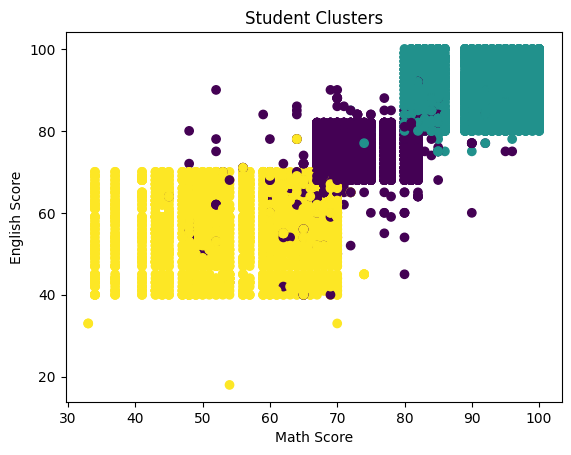

In [23]:
# Visualize the clusters (optional - choose appropriate features for visualization)
plt.scatter(df_encoded['math'], df_encoded['english'], c=df_encoded['cluster'])
plt.xlabel('Math Score')
plt.ylabel('English Score')
plt.title('Student Clusters')
plt.show()

In [24]:
def remove_outliers_after_clustering(df, kmeans, threshold=1.5):
    """
    Removes outliers from a DataFrame after clustering based on distance to cluster centers.

    Args:
        df (pd.DataFrame): DataFrame with cluster assignments.
        kmeans (KMeans): Fitted KMeans object.
        threshold (float): Standard deviation threshold for outlier detection.

    Returns:
        pd.DataFrame: DataFrame with outliers removed.
    """

    df['distance_to_center'] = np.min(kmeans.transform(df[features_for_clustering]), axis=1)
    
    # Calculate mean and standard deviation of distances for each cluster
    cluster_stats = df.groupby('cluster')['distance_to_center'].agg(['mean', 'std'])

    # Identify outliers based on threshold
    df['outlier'] = False
    for cluster_id in range(kmeans.n_clusters):
        mean_dist = cluster_stats.loc[cluster_id, 'mean']
        std_dist = cluster_stats.loc[cluster_id, 'std']
        df.loc[df['cluster'] == cluster_id, 'outlier'] = df.loc[df['cluster'] == cluster_id, 'distance_to_center'] > mean_dist + threshold * std_dist

    # Remove outliers
    df_filtered = df[df['outlier'] == False].copy()
    df_filtered.drop(['distance_to_center', 'outlier'], axis=1, inplace=True)
    return df_filtered

df_filtered = remove_outliers_after_clustering(df_encoded.copy(), kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [25]:
# Assign labels to clusters based on your analysis
cluster_labels = {
    0: 'Excellent', 
    1: 'Moderate', 
    2: 'At-Risk'  
}

In [26]:
df_filtered['cluster_label'] = df_filtered['cluster'].map(cluster_labels)
df_filtered

,id,full_name,age,location,family_size,mother_education,father_education,mother_job,father_job,guardian,...,english,math,science,social_science,art_culture,gender_Male,stu_group_Commerce,stu_group_Science,cluster,cluster_label
1,3,6366,18,1,6,2,3,0,1,0,...,65,71,40,78,80,0,1,0,0,Excellent
2,4,3563,15,1,4,2,2,1,1,0,...,64,78,58,86,74,1,1,0,0,Excellent
3,5,5433,16,1,6,2,2,1,1,0,...,84,90,85,86,88,1,0,1,1,Moderate
4,6,1142,17,2,5,5,6,0,1,0,...,54,70,45,79,76,1,1,0,0,Excellent
5,7,2442,15,2,5,3,4,0,1,0,...,56,48,78,88,88,1,0,1,0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,8607,65,17,0,6,1,1,0,0,0,...,78,68,79,76,74,0,1,0,0,Excellent
8606,8608,2403,17,1,7,5,3,1,1,0,...,86,86,84,82,84,0,0,1,1,Moderate
8607,8609,1264,17,0,5,3,0,0,0,1,...,81,83,80,84,91,0,0,1,1,Moderate
8609,8611,422,18,0,3,4,2,0,0,2,...,45,59,41,51,69,1,0,0,2,At-Risk


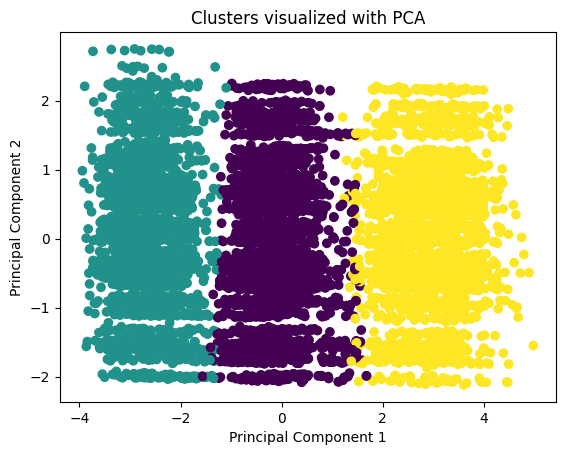

In [27]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_encoded['cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters visualized with PCA')
plt.show()

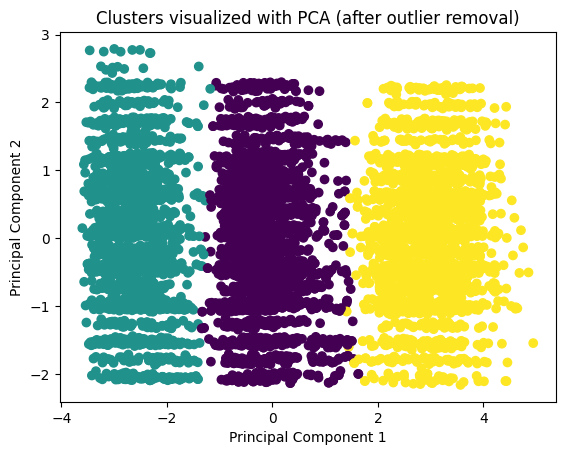

In [28]:
X_filtered = df_filtered[features_for_clustering]

# Standardize the features of the filtered DataFrame
X_scaled_filtered = scaler.fit_transform(X_filtered)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_filtered)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_filtered['cluster'])  # Use df_filtered['cluster'] for colors
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters visualized with PCA (after outlier removal)')
plt.show()


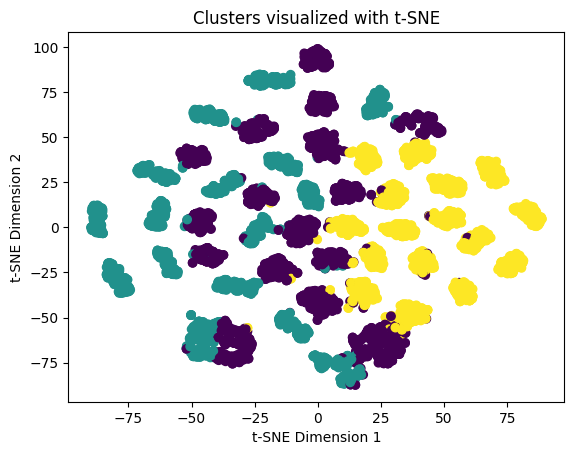

In [29]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_encoded['cluster'])
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clusters visualized with t-SNE')
plt.show()


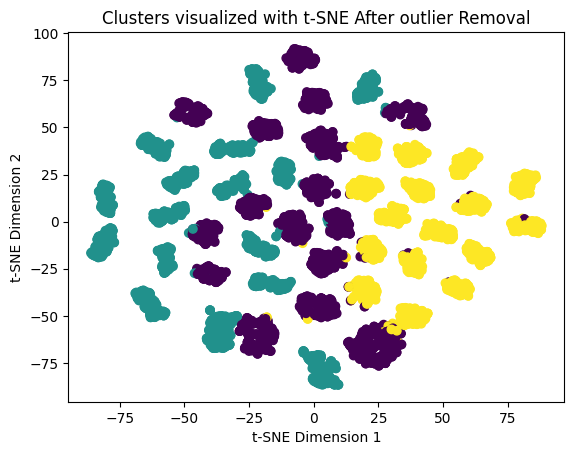

In [30]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled_filtered)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_filtered['cluster'])
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clusters visualized with t-SNE After outlier Removal')
plt.show()

In [31]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled_filtered, df_filtered['cluster']) 
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.18022958405857517


In [32]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 61418.675224527455


In [33]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(X_scaled_filtered, df_filtered['cluster'])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.9481811142018028


In [34]:
from sklearn.metrics import calinski_harabasz_score

ch_index = calinski_harabasz_score(X_scaled_filtered, df_filtered['cluster'])
print(f"Calinski-Harabasz Index: {ch_index}")

Calinski-Harabasz Index: 2783.718740311932


In [35]:
# Cluster assignments
labels = kmeans.labels_

# Count points in each cluster
from collections import Counter
point_counts = Counter(labels)
print("Points in each cluster:", point_counts)

Points in each cluster: Counter({0: 3156, 1: 2823, 2: 2620})


In [36]:
X_scaled_filtered.shape

(8057, 12)

In [37]:
X_scaled_filtered[:-8024,:]

array([[-0.05140642, -1.08651471,  0.94362441, -0.96139974, -1.02628552,
         1.43830791, -0.54121213, -0.09793076, -2.20863273,  0.26508673,
         0.3035983 , -0.3461335 ],
       [-0.05140642,  0.9203741 ,  0.94362441,  1.04015006,  0.97438771,
         0.5980783 , -0.60658175,  0.34702186, -1.01065099,  0.80168715,
        -0.14007005,  0.11292783],
       [-0.05140642,  0.9203741 ,  0.94362441,  1.04015006,  0.97438771,
         1.28553889,  0.70081072,  1.10979778,  0.78632162,  0.80168715,
         0.89515611,  1.0310505 ],
       [ 1.04721826,  0.9203741 ,  0.94362441, -0.96139974,  0.97438771,
         0.13977123, -1.26027799, -0.16149542, -1.87586002,  0.33216178,
         0.0078194 , -0.3461335 ],
       [ 1.04721826,  0.9203741 ,  0.94362441, -0.96139974,  0.97438771,
        -0.62407387, -1.12953874, -1.55991793,  0.32043984,  0.93583725,
         0.89515611, -0.3461335 ],
       [-1.15003109,  0.9203741 ,  0.94362441, -0.96139974,  0.97438771,
        -0.0893823 ,  

In [38]:
df_filtered.head()

,id,full_name,age,location,family_size,mother_education,father_education,mother_job,father_job,guardian,...,english,math,science,social_science,art_culture,gender_Male,stu_group_Commerce,stu_group_Science,cluster,cluster_label
1,3,6366,18,1,6,2,3,0,1,0,...,65,71,40,78,80,0,1,0,0,Excellent
2,4,3563,15,1,4,2,2,1,1,0,...,64,78,58,86,74,1,1,0,0,Excellent
3,5,5433,16,1,6,2,2,1,1,0,...,84,90,85,86,88,1,0,1,1,Moderate
4,6,1142,17,2,5,5,6,0,1,0,...,54,70,45,79,76,1,1,0,0,Excellent
5,7,2442,15,2,5,3,4,0,1,0,...,56,48,78,88,88,1,0,1,0,Excellent


In [39]:
df_filtered.shape

(8057, 27)

In [40]:
P_columns = ['location','internet_access','parental_involvement','mother_job','tutoring', 'attendance', 
    'english', 'math', 'science', 
    'social_science', 'art_culture','studytime' ]
Q_columns = ['cluster']

# Create P and Q datasets
P = df_filtered[P_columns]
Q = df_filtered[Q_columns]


In [41]:
P_train, P_test, Q_train, Q_test = train_test_split(P, Q, test_size=0.2,random_state=42)

In [42]:
a=P_train
b=Q_train
c=P_test
d=Q_test

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
P_train_resampled, Q_train_resampled = smote.fit_resample(P_train, Q_train)

In [44]:
a=P_train_resampled
b=Q_train_resampled

In [45]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

start = time.time()
resultsAccuracy = []
resultsF1 = []
resultsConfusion = []
models = [
    ('RF', RandomForestClassifier( n_estimators=100,          # Number of trees in the forest
    max_depth=10,              # Maximum depth of each tree (limits overfitting)
    min_samples_split=5,       # Minimum samples required to split an internal node
    min_samples_leaf=2,        # Minimum samples required at a leaf node
    max_features='sqrt',       # Number of features to consider when looking for the best split
    random_state=42,           # Ensures reproducibility
    bootstrap=True  )),
    ('KNN', KNeighborsClassifier(n_neighbors=5,            # Number of neighbors to consider (default is 5)
    weights='uniform',        # Weight function: 'uniform' or 'distance'
    algorithm='auto',         # Algorithm to compute nearest neighbors: 'auto', 'ball_tree', 'kd_tree', or 'brute'
    leaf_size=30,             # Leaf size for tree-based algorithms (affects speed/memory)
    p=2,                      # Power parameter for the Minkowski metric (2 = Euclidean distance)
    metric='minkowski',       # Metric used for distance computation
    n_jobs=-1   )),
    ('ExtraTrees', ExtraTreesClassifier(n_estimators=100,          # Number of trees in the forest
    max_depth=10,              # Maximum depth of each tree (limits overfitting)
    min_samples_split=5,       # Minimum samples required to split an internal node
    min_samples_leaf=2,        # Minimum samples required at a leaf node
    max_features='sqrt',       # Number of features to consider when looking for the best split
    bootstrap=False,           # Whether to use bootstrapped samples
    random_state=42,           # Ensures reproducibility
    n_jobs=-1 )),                 # Number of parallel jobs (-1 uses all processors))),
    ('NaiveBayes', GaussianNB(var_smoothing=1e-9)),
    ('Bagging', BaggingClassifier(  base_estimator=DecisionTreeClassifier(max_depth=5),  # Base model (weak learner)
    n_estimators=50,             # Number of base estimators
    max_samples=0.8,             # Fraction of the dataset to sample for training each base estimator
    max_features=0.8,            # Fraction of features to sample for training each base estimator
    bootstrap=True,              # Use bootstrapped samples
    bootstrap_features=False,    # Whether to bootstrap features
    random_state=42,             # Ensures reproducibility
    n_jobs=-1    )),
    ('DTC', DecisionTreeClassifier(max_depth=4,               # Limit the depth of the tree
    min_samples_split=10,      # Minimum samples required to split a node
    min_samples_leaf=5,        # Minimum samples required at a leaf node
    random_state=42)),
    ('AdaBoost', AdaBoostClassifier(    base_estimator=DecisionTreeClassifier(
        max_depth=3,            # Limit depth for weak learners
        min_samples_split=10,   # Minimum samples for splitting
        min_samples_leaf=5,     # Minimum samples per leaf
        random_state=42
    ),
    n_estimators=50,            # Number of weak learners
    learning_rate=0.01,         # Learning rate for regularization
    random_state=42)),
    ('SVM', SVC( C=1.0,                     # Regularization parameter (lower values mean stronger regularization)
    kernel='rbf',              # Kernel type: 'linear', 'poly', 'rbf', 'sigmoid', or 'precomputed'
    gamma='scale',             # Kernel coefficient ('scale' adjusts based on the number of features)
    probability=True,          # Enable probability estimates (useful for classification)
    random_state=42   ))
    
]

batch_size = 1 # Adjust batch size as needed
batches = [models[i:i + batch_size] for i in range(0, len(models), batch_size)]

for batch in batches:
    resultsAccuracy_batch = []
    resultsF1_batch = []
    resultsConfusion_batch = []
    names = []
    for name, model in batch:
        model.fit(a, b)  # Fit the model on the training data
        kfold = KFold(n_splits=2)
        y_pred = cross_val_predict(model, c, d, cv=kfold)
        accuracy = accuracy_score(d, y_pred)
        f1 = f1_score(d, y_pred, average='macro')  # Calculate F1 score with average='macro'
        confusion = confusion_matrix(d, y_pred)
        resultsAccuracy_batch.append(accuracy)
        resultsF1_batch.append(f1)
        resultsConfusion_batch.append(confusion)
        names.append(name)
        accuracyMessage = "%s Accuracy: %f" % (name, accuracy)
        print(accuracyMessage)
        f1Message = "%s F1 Score: %f" % (name, f1)
        print(f1Message)
        confusionMessage = "%s Confusion Matrix:\n%s" % (name, confusion)
        print(confusionMessage)
    resultsAccuracy.append(resultsAccuracy_batch)
    resultsF1.append(resultsF1_batch)
    resultsConfusion.append(resultsConfusion_batch)

end = time.time()
print('Total time cost is：', end - start, 's')

<ipython-input-45-bf2fe99c5c1c>:86: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(a, b)  # Fit the model on the training data
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1068: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1068: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


RF Accuracy: 0.986352
RF F1 Score: 0.986727
RF Confusion Matrix:
[[601   1  13]
 [  5 489   0]
 [  3   0 500]]
KNN Accuracy: 0.990074
KNN F1 Score: 0.990358
KNN Confusion Matrix:
[[604   0  11]
 [  3 491   0]
 [  2   0 501]]


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-45-bf2fe99c5c1c>:86: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(a, b)  # Fi

ExtraTrees Accuracy: 0.991315
ExtraTrees F1 Score: 0.991531
ExtraTrees Confusion Matrix:
[[606   1   8]
 [  5 489   0]
 [  0   0 503]]
NaiveBayes Accuracy: 0.984491
NaiveBayes F1 Score: 0.984940
NaiveBayes Confusion Matrix:
[[594   1  20]
 [  4 490   0]
 [  0   0 503]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Bagging Accuracy: 0.983251
Bagging F1 Score: 0.983684
Bagging Confusion Matrix:
[[597   4  14]
 [  5 489   0]
 [  4   0 499]]
DTC Accuracy: 0.957196
DTC F1 Score: 0.958213
DTC Confusion Matrix:
[[588  15  12]
 [ 18 476   0]
 [ 23   1 479]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarnin

AdaBoost Accuracy: 0.980769
AdaBoost F1 Score: 0.981233
AdaBoost Confusion Matrix:
[[597   9   9]
 [  5 489   0]
 [  8   0 495]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy: 0.985732
SVM F1 Score: 0.986156
SVM Confusion Matrix:
[[596   0  19]
 [  4 490   0]
 [  0   0 503]]
Total time cost is： 4.687324047088623 s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
P_train_resampled, Q_train_resampled = smote.fit_resample(P_train, Q_train)

# Standardize the data
scaler = StandardScaler()
P_train_scaled = scaler.fit_transform(P_train_resampled)
P_test_scaled = scaler.transform(P_test)

# Apply regularization to DecisionTreeClassifier
dtc = DecisionTreeClassifier(
    max_depth=4,               # Limit the depth of the tree
    min_samples_split=10,      # Minimum samples required to split a node
    min_samples_leaf=5,        # Minimum samples required at a leaf node
    random_state=42
)

# Apply regularization to AdaBoostClassifier with a regularized base estimator
adaboost = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(
        max_depth=3,            # Limit depth for weak learners
        min_samples_split=10,   # Minimum samples for splitting
        min_samples_leaf=5,     # Minimum samples per leaf
        random_state=42
    ),
    n_estimators=50,            # Number of weak learners
    learning_rate=0.01,         # Learning rate for regularization
    random_state=42
)

# Create an ensemble using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('DTC', dtc),
        ('AdaBoost', adaboost)
    ],
    voting='soft'  # Use soft voting for probabilities
)

# Train the ensemble model
ensemble_model.fit(P_train_scaled, Q_train_resampled.values.ravel())

# Evaluate the ensemble model on the test set
Q_pred = ensemble_model.predict(P_test_scaled)

# Calculate metrics
accuracy = accuracy_score(Q_test, Q_pred)
f1 = f1_score(Q_test, Q_pred, average='macro')
conf_matrix = confusion_matrix(Q_test, Q_pred)
classification_rep = classification_report(Q_test, Q_pred)

# Print results
print(f"Ensemble Model Accuracy: {accuracy}")
print(f"Ensemble Model F1 Score: {f1}")
print("Ensemble Model Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Cross-validation
cv_scores = cross_val_score(ensemble_model, P_train_scaled, Q_train_resampled.values.ravel(), cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean()}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Ensemble Model Accuracy: 0.9689826302729528
Ensemble Model F1 Score: 0.9698437862060012
Ensemble Model Confusion Matrix:
[[606   1   8]
 [ 18 476   0]
 [ 23   0 480]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       615
           1       1.00      0.96      0.98       494
           2       0.98      0.95      0.97       503

    accuracy                           0.97      1612
   macro avg       0.97      0.97      0.97      1612
weighted avg       0.97      0.97      0.97      1612



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Cross-validation scores: [0.9789916  0.97969188 0.97689076 0.97338936 0.97689076]
Mean CV accuracy: 0.9771708683473388
